In [1]:
# Librería para manipulación y análisis de datos
import pandas as pd

In [2]:
# Descargar archivo preprocesado 
!wget http://108.62.123.70/GarmentProd/new_number_garments_worker_productivity.csv

--2021-06-28 21:30:55--  http://108.62.123.70/GarmentProd/new_number_garments_worker_productivity.csv
Connecting to 108.62.123.70:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73094 (71K) [text/csv]
Saving to: ‘new_number_garments_worker_productivity.csv.1’

new_number_garments 100%[===================>]  71.38K  --.-KB/s    in 0.003s  

2021-06-28 21:30:55 (20.8 MB/s) - ‘new_number_garments_worker_productivity.csv.1’ saved [73094/73094]



In [3]:
%ls

new_number_garments_worker_productivity.csv
new_number_garments_worker_productivity.csv.1
new_number_garments_worker_productivity_test.csv
new_number_garments_worker_productivity_train.csv
sample_data/


In [4]:
#Lectura del grupo de datos CSV
file_name = "new_number_garments_worker_productivity.csv"

#El método "read_csv" nos permite leer un CSV
dataset = pd.read_csv(file_name)

In [5]:
print(dataset.head())

   date  quarter  ...  no_of_workers  actual_productivity
0    56        1  ...           59.0             0.940725
1    56        1  ...            8.0             0.886500
2    56        1  ...           30.5             0.800570
3    56        1  ...           30.5             0.800570
4    56        1  ...           56.0             0.800382

[5 rows x 15 columns]


In [6]:
print(dataset.shape)

(1197, 15)


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int64  
 1   quarter                1197 non-null   int64  
 2   department             1197 non-null   int64  
 3   day                    1197 non-null   int64  
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
print(dataset.describe())

              date      quarter  ...  no_of_workers  actual_productivity
count  1197.000000  1197.000000  ...    1197.000000          1197.000000
mean     28.917293     2.020050  ...      34.609858             0.735091
std      17.098789     1.557568  ...      22.197687             0.174488
min       0.000000     0.000000  ...       2.000000             0.233705
25%      14.000000     1.000000  ...       9.000000             0.650307
50%      29.000000     1.000000  ...      34.000000             0.773333
75%      44.000000     4.000000  ...      57.000000             0.850253
max      58.000000     4.000000  ...      89.000000             1.120437

[8 rows x 15 columns]


# Gradient Boosting Regression

Se demuestra el aumento de gradiente para producir un modelo predictivo a partir de un conjunto de modelos predictivos débiles. El aumento de gradiente se puede utilizar para problemas de regresión y clasificación. Aquí, entrenaremos un modelo para abordar una tarea de regresión de la productividad de trabajadores de una empresa de confección de prendas. Obtendremos los resultados de GradientBoostingRegressor.

Fuente: Science Kit, scikit-learn, Machine Learning in Python

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

Fuente:  Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>, Maria Telenczuk <https://github.com/maikia>, Katrina Ni <https://github.com/nilichen>, License: BSD 3 clause

In [9]:
# Cargar librerías como ensemble que contiene Gradient Boosting Regressor y Grid Search CV y otras herramientas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [10]:
# Dividir variables dependientes de la variable dependiente
X, y = dataset.iloc[:,:-1],dataset.iloc[:,-1]

In [11]:
# Verificar división
print(X)
print(X.shape)
print(y)
print(y.shape)

      date  quarter  department  ...  idle_men  no_of_style_change  no_of_workers
0       56        1           0  ...         0                   0           59.0
1       56        1           2  ...         0                   0            8.0
2       56        1           0  ...         0                   0           30.5
3       56        1           0  ...         0                   0           30.5
4       56        1           0  ...         0                   0           56.0
...    ...      ...         ...  ...       ...                 ...            ...
1192     3        4           1  ...         0                   0            8.0
1193     3        4           1  ...         0                   0            8.0
1194     3        4           1  ...         0                   0            8.0
1195     3        4           1  ...         0                   0           15.0
1196     3        4           1  ...         0                   0            6.0

[1197 rows x 14

Dividiremos nuestro conjunto de datos para usar el 15% para el entrenamiento y dejar el resto para la validación. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)



También estableceremos los parámetros del modelo de regresión.

n_estimators: el número de etapas de refuerzo que se realizarán.

max_depth: limita el número de nodos en el árbol. El mejor valor depende de la interacción de las variables de entrada.

min_samples_split: el número mínimo de muestras necesarias para dividir un nodo interno.

learning_rate: cuánto se reducirá la contribución de cada árbol.

loss: función de pérdida para optimizar. 

In [13]:
params = {'n_estimators': 100,
          'max_depth': 10,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

Ajustar modelo de regresión. Ahora iniciaremos los regresores de aumento de gradiente y los ajustaremos con nuestros datos de entrenamiento. Veamos también el error cuadrático medio en los datos de validación, la raíz del error cuadrático medio en los datos de validación y el puntaje (score) de entrenamiento y validación.

In [14]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

reg_predict = reg.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, reg_predict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0225


In [16]:
rmse = np.sqrt(mean_squared_error(y_test, reg_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.150080


In [17]:
reg_score_train = reg.score(X_train, y_train)
print(reg_score_train)

0.9995973584662836


In [18]:
reg_score_test = reg.score(X_test, y_test)
print(reg_score_test)

0.24148904993693


El entrenamiento esta cerca del sobreajuste (overfitting) y el puntaje con datos de validación son muy bajos.

Trace la desviación del entrenamiento. Visualizaremos los resultados. Para hacer eso, primero calcularemos la desviación del conjunto de prueba y luego la graficaremos contra las iteraciones de impulso.

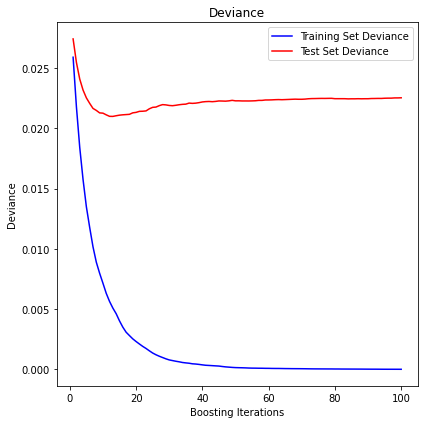

In [19]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Importancia de las características. Importancias de características basadas en impurezas y basadas en permutación.

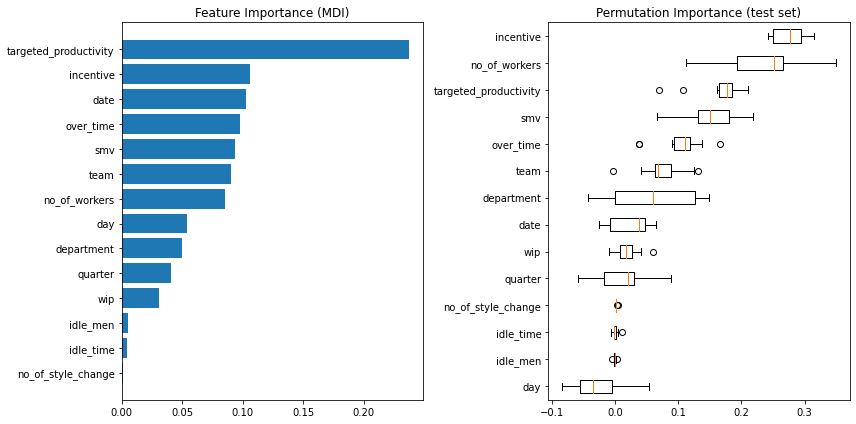

In [20]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(dataset.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(dataset.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Visualizaremos los valores "y" de validación y comparados con los valores predecidos con el entrenamiento en una gráfica.

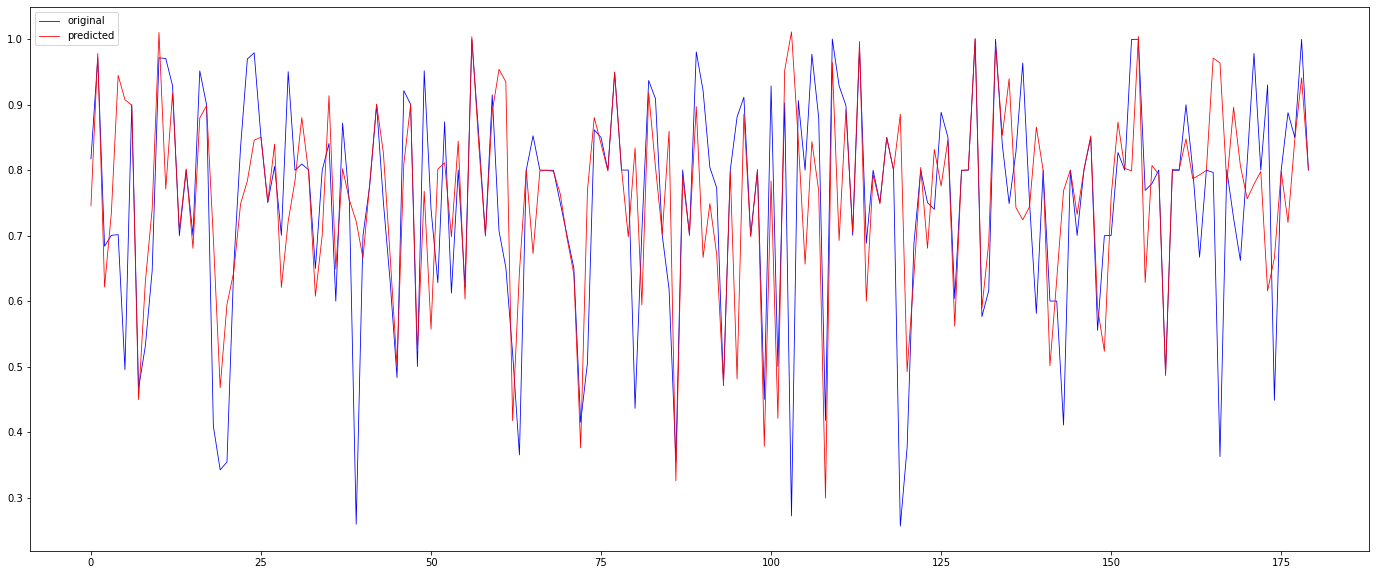

In [21]:
x_ax = range(len(y_test))
plt.figure(figsize=(24,10))
#plt.scatter(x_ax, y_val, s=5, color="blue", label="original")
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="original")
plt.plot(x_ax, reg_predict, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#GridSearchCV.
Es una clase contenedora proporcionada por sklearn que recorre todos los parámetros proporcionados como parámetro params_grid con una serie de pliegues de validación cruzada proporcionados como parámetro cv, evalúa el rendimiento del modelo en todas las combinaciones y almacena todos los resultados en el atributo cv_results_. También almacena el modelo que se desempeña mejor en todos los pliegues de validación cruzada en el atributo best_estimator_ y la mejor puntuación en el atributo best_score_.

El parámetro n_jobs lo proporcionan muchos estimadores. Acepta el número de núcleos que se utilizarán para la paralelización. Si se da el valor de -1, entonces usa todos los núcleos. Utiliza la biblioteca de procesamiento paralelo joblib para ejecutar cosas en paralelo en segundo plano.

Probaremos varios valores para los hiperparámetros mencionados anteriormente para encontrar el mejor estimador para nuestro conjunto de datos haciendo una validación cruzada.

Fuente: Science Kit, scikit-learn, Machine Learning in Python

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [22]:
# Verificar datos de entrenamiento
print(X_train.shape[0])
print(X_train.shape[1])

1017
14


In [23]:
# Establecer parámetros a probar
%%time

params = {'n_estimators': [50,100,150,200],
          'max_depth': [4,8,12],
          'min_samples_split': [5,10,15],
          'learning_rate': [0.05,0.1,0.15,0.2],
          'loss': ['ls', 'lad', 'huber', 'quantile']}

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 11.7 µs


In [24]:
# Evaluar Grid Search CV con los parámetros para Gradient Boosting Regressor usando datos de entrenamiento
grad_boost_regressor_grid = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=123), param_grid =params, cv=5, n_jobs=-1, verbose=1)
grad_boost_regressor_grid.fit(X_train, y_train)



Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 35.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [26]:
# Se muestran los mejores puntajes y mejor modelo 
print('Train R^2 Score : %.3f'%grad_boost_regressor_grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%grad_boost_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grad_boost_regressor_grid.best_score_)
print('Best Parameters : ',grad_boost_regressor_grid.best_params_)

Train R^2 Score : 0.815
Test R^2 Score : 0.413
Best R^2 Score Through Grid Search : 0.529
Best Parameters :  {'learning_rate': 0.15, 'loss': 'lad', 'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 200}


Impresión de los primeros resultados de validación cruzada. GridSearchCV mantiene los resultados de todas las combinaciones de parámetros probadas con todas las divisiones de validación cruzada. Podemos acceder a los resultados de todas las iteraciones como un diccionario llamando al atributo cv_results_ en él.

In [27]:
cross_val_results = pd.DataFrame(grad_boost_regressor_grid.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.head() ## Imprimir primeros resultados de la tabla de validación cruzada.

Number of Various Combinations of Parameters Tried : 576


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.150117,0.019094,0.004037,0.002133,0.05,ls,4,5,50,"{'learning_rate': 0.05, 'loss': 'ls', 'max_dep...",0.398052,0.522374,0.539356,0.516464,0.445708,0.484391,0.053746,172
1,0.270263,0.005873,0.004558,0.000762,0.05,ls,4,5,100,"{'learning_rate': 0.05, 'loss': 'ls', 'max_dep...",0.418614,0.541887,0.562451,0.535000,0.467967,0.505184,0.053657,70
2,0.388671,0.017546,0.003525,0.000113,0.05,ls,4,5,150,"{'learning_rate': 0.05, 'loss': 'ls', 'max_dep...",0.404716,0.545007,0.582968,0.529320,0.468572,0.506116,0.062688,62
3,0.494271,0.011970,0.004251,0.000529,0.05,ls,4,5,200,"{'learning_rate': 0.05, 'loss': 'ls', 'max_dep...",0.404926,0.547429,0.581577,0.522680,0.465034,0.504329,0.062589,74
4,0.128061,0.004978,0.003184,0.000516,0.05,ls,4,10,50,"{'learning_rate': 0.05, 'loss': 'ls', 'max_dep...",0.396614,0.521954,0.530445,0.522044,0.442745,0.482760,0.053620,181


# Evaluación del mejor modelo 

In [28]:
# Predecir usando datos de prueba solamente
grad_boost_regressor_grid_predict = grad_boost_regressor_grid.predict(X_test)

Veamos también el error cuadrático medio en los datos de prueba, la raíz del error cuadrático medio en los datos de prueba y el puntaje (score) de entrenamiento y pruebas.

In [29]:
mse = mean_squared_error(y_test, grad_boost_regressor_grid_predict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0174


In [30]:
rmse = np.sqrt(mean_squared_error(y_test, grad_boost_regressor_grid_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.131999


In [32]:
reg_score_train = grad_boost_regressor_grid.score(X_train, y_train)
print(reg_score_train)

0.8150760860497259


In [33]:
reg_score_test = grad_boost_regressor_grid.score(X_test, y_test)
print(reg_score_test)

0.41324372699290046


El puntaje mejoró para datos de entrenamiento sin sobreajuste y para datos de prueba.

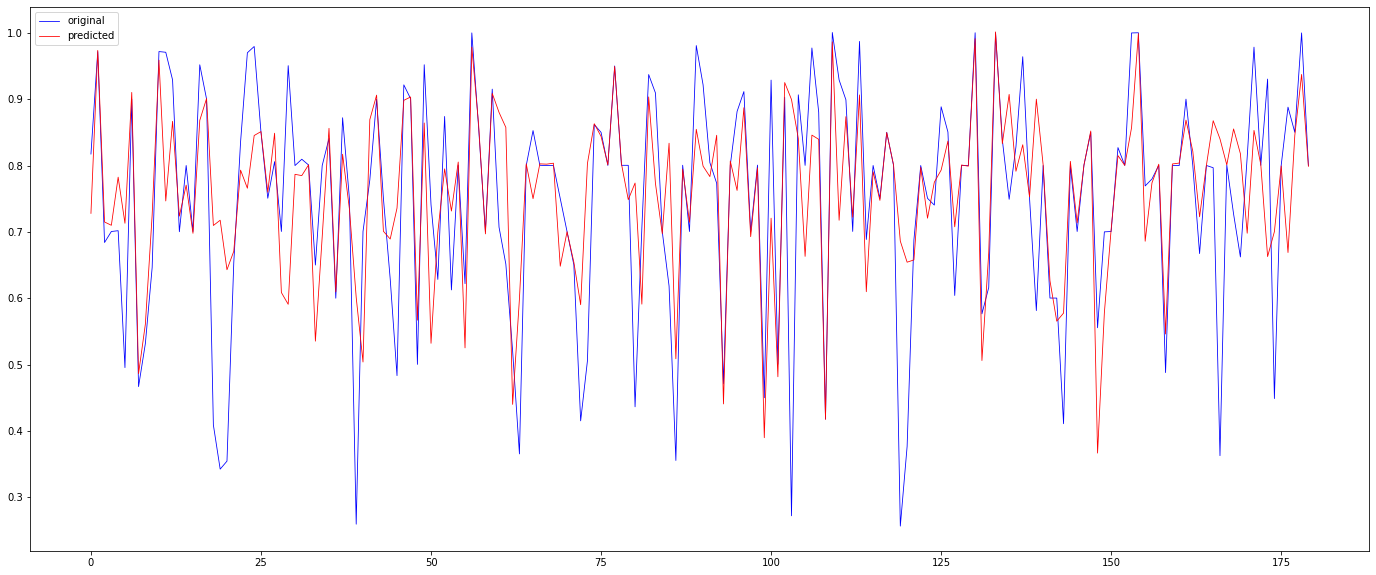

In [35]:
x_ax = range(len(y_test))
plt.figure(figsize=(24,10))
#plt.scatter(x_ax, y_val, s=5, color="blue", label="original")
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="original")
plt.plot(x_ax, grad_boost_regressor_grid_predict, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()